<a href="https://colab.research.google.com/github/JPVillamizarCastillo/TRAINING/blob/main/Reto_1_Modelos_cl%C3%A1sicos_Regresi%C3%B3n_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de daños por incendios forestales en California

## Objetivo

Desarrollar un modelo de aprendizaje supervisado para predecir los daños causados por incendios forestales en California, aplicando técnicas de regresión y codificación de variables categóricas.


# Data description
The California Wildfire Damage Dataset provides a comprehensive overview of wildfire incidents across California over the past decade. It includes data on the extent of destruction, such as the area burned (in acres), number of homes and businesses destroyed, vehicles damaged, injuries, fatalities, and estimated financial losses (in million dollars). The dataset also records the date, location, and cause of each wildfire, categorizing causes as Lightning, Human Activity, or Unknown.

This dataset is valuable for analyzing wildfire trends, assessing financial impacts, and aiding in disaster preparedness and mitigation planning. It can be used by researchers, policymakers, and environmental analysts to gain insights into the economic and environmental consequences of wildfires in California.

###  I. Carga de datos

1. Descarga el conjunto de datos desde el siguiente enlace de Kaggle: [California Wildfire Damage](https://www.kaggle.com/datasets/vivekattri/california-wildfire-damage-2014-feb2025).
2. Carga los datos en un DataFrame de Pandas.

In [ ]:
#Importamos las libreris necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.ticker import StrMethodFormatter
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ESTUDIO/UNI/OCTAVO SEMESTRE/Aprendizaje supervisado/RETO #1-Aprendizaje supervisado/California Wildfire Damage.csv")
df.head(5)

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,Lightning
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,Lightning
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,Human Activity
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,Unknown
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,Unknown


### II. Exploración y preprocesamiento de datos

1. Revisa las primeras filas del DataFrame y utiliza métodos como `info()` y `describe()` para entender la estructura y resumen estadístico de los datos.
2. Identifica columnas con valores nulos y decide cómo manejarlos (por ejemplo, eliminación o imputación).
3. Asegúrate de que las columnas tengan los tipos de datos adecuados (por ejemplo, fechas como datetime).

In [ ]:
#De esta forma sabemos que tipo de dato tiene cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Incident_ID                           100 non-null    object 
 1   Date                                  100 non-null    object 
 2   Location                              100 non-null    object 
 3   Area_Burned (Acres)                   100 non-null    int64  
 4   Homes_Destroyed                       100 non-null    int64  
 5   Businesses_Destroyed                  100 non-null    int64  
 6   Vehicles_Damaged                      100 non-null    int64  
 7   Injuries                              100 non-null    int64  
 8   Fatalities                            100 non-null    int64  
 9   Estimated_Financial_Loss (Million $)  100 non-null    float64
 10  Cause                                 100 non-null    object 
dtypes: float64(1), int64

In [ ]:
df.describe()

,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $)
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,26531.460000,941.890000,251.570000,150.330000,42.040000,9.930000,2396.099300
std,14282.123824,543.019967,138.317761,88.471197,29.201467,5.682251,1430.439422
min,357.000000,18.000000,4.000000,5.000000,0.000000,0.000000,52.590000
25%,15916.250000,501.000000,134.750000,70.750000,16.000000,5.000000,1175.195000
50%,25618.000000,908.500000,256.500000,150.500000,37.000000,10.000000,2408.530000
75%,39775.000000,1401.750000,371.000000,229.750000,60.000000,14.250000,3662.110000
max,49653.000000,1968.000000,493.000000,300.000000,100.000000,20.000000,4866.990000


No hay presencia de valores nulos en la base de datos

In [ ]:
# Identifica columnas con datos nulos y cuántos nulos hay en cada una
columnas_con_nulos = df.isnull().sum()

# Imprime las columnas con nulos y su cantidad
print(columnas_con_nulos[columnas_con_nulos > 0])

Series([], dtype: int64)


ESTUDIAR LA MULTICOLEANIDAD Y COMO AFECTA A LOS MODELOS

Aplicamos One-Hot-Encoding para la variable "Cause"

### III. Codificación de Variables Categóricas

---


 En muchos conjuntos de datos, las variables categóricas deben transformarse en valores numéricos para que los modelos de Machine Learning puedan procesarlas. Existen dos técnicas principales:

#### 1. Label Encoding
 El **Label Encoding** convierte cada categoría en un número entero único. Se usa cuando las categorías tienen un **orden implícito**.

 **Ejemplo:**

 | Cause       | Label Encoding |
 |------------|---------------|
| Lightning  | 0             |
| Human      | 1             |
 | Unknown    | 2             |

 **Código en Python con `LabelEncoder`:**
 ```python
 from sklearn.preprocessing import LabelEncoder
 label_encoder = LabelEncoder()
 df["Cause_Label"] = label_encoder.fit_transform(df["Cause"])
 ```
**Nota:** Este método **no es ideal** para variables sin un orden, ya que el modelo puede interpretar erróneamente que una ategoría es "mayor" que otra.

 ---

#### 2.  One-Hot Encoding
 El **One-Hot Encoding** crea una columna binaria (0 o 1) para cada categoría, evitando la asignación de valores ordinales incorrectos.

 **Ejemplo:**

 | Location   | Location_LA | Location_SF | Location_Sacramento |
 |------------|------------|-------------|---------------------|
 | LA         | 1          | 0           | 0                   |
 | SF         | 0          | 1           | 0                   |
 | Sacramento | 0          | 0           | 1                   |

 **Código en Python con `pd.get_dummies()`:**
 ```python
 df = pd.get_dummies(df, columns=["Location"], drop_first=True)
 ```
 **Ventaja:** Evita la falsa interpretación de una jerarquía en los datos.
**Desventaja:** Puede generar muchas columnas si hay demasiadas categorías.

 **¿Cuándo usar cada técnica?**
 - **Usa Label Encoding** si la variable tiene un orden inherente (por ejemplo, "Bajo", "Medio", "Alto").
 - **Usa One-Hot Encoding** si la variable no tiene un orden y hay pocas categorías únicas.
 ---

Label Encoding: Aplica Label Encoding a variables categóricas ordinales, si las hay.
One-Hot Encoding: Aplica One-Hot Encoding a variables categóricas nominales. Puedes utilizar pd.get_dummies() de Pandas para este propósito.

Nota: La codificación de variables categóricas es esencial para que los modelos de regresión puedan procesar estas variables.

In [ ]:
# Se usa drop_first para eviyar la multicoleanidad
df=pd.get_dummies(df,columns=["Cause"],drop_first=True)
df.head()

,Incident_ID,Date,Location,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause_Lightning,Cause_Unknown
0,INC1000,2020-11-22,Sonoma County,14048,763,474,235,70,19,2270.57,True,False
1,INC1001,2021-09-23,Sonoma County,33667,1633,4,263,100,2,1381.14,True,False
2,INC1002,2022-02-10,Shasta County,26394,915,291,31,50,6,2421.96,False,False
3,INC1003,2021-05-17,Sonoma County,20004,1220,128,34,28,0,3964.16,False,True
4,INC1004,2021-09-22,Sonoma County,40320,794,469,147,0,15,1800.09,False,True


Aplicamos One-Hot-Encoding para Location

In [ ]:
df=pd.get_dummies(df,columns=["Location"],drop_first=True)
df.head()

,Incident_ID,Date,Area_Burned (Acres),Homes_Destroyed,Businesses_Destroyed,Vehicles_Damaged,Injuries,Fatalities,Estimated_Financial_Loss (Million $),Cause_Lightning,Cause_Unknown,Location_Los Angeles County,Location_Mendocino County,Location_Napa Valley,Location_Orange County,Location_Riverside County,Location_San Diego County,Location_Santa Barbara County,Location_Shasta County,Location_Sonoma County
0,INC1000,2020-11-22,14048,763,474,235,70,19,2270.57,True,False,False,False,False,False,False,False,False,False,True
1,INC1001,2021-09-23,33667,1633,4,263,100,2,1381.14,True,False,False,False,False,False,False,False,False,False,True
2,INC1002,2022-02-10,26394,915,291,31,50,6,2421.96,False,False,False,False,False,False,False,False,False,True,False
3,INC1003,2021-05-17,20004,1220,128,34,28,0,3964.16,False,True,False,False,False,False,False,False,False,False,True
4,INC1004,2021-09-22,40320,794,469,147,0,15,1800.09,False,True,False,False,False,False,False,False,False,False,True


### IV. Selección de características (features)

1. Selecciona las variables independientes (features) que consideres relevantes para predecir los daños causados por los incendios.
2. Define la variable dependiente (target), que en este caso sería la medida de daño causado por el incendio.

In [ ]:
# Elimina la columna 'id' debido a que esta no nos permite analizarla en la matriz de la correlación
df=df.drop('Incident_ID', axis=1)  # axis=1 indica que quieres eliminar una columna

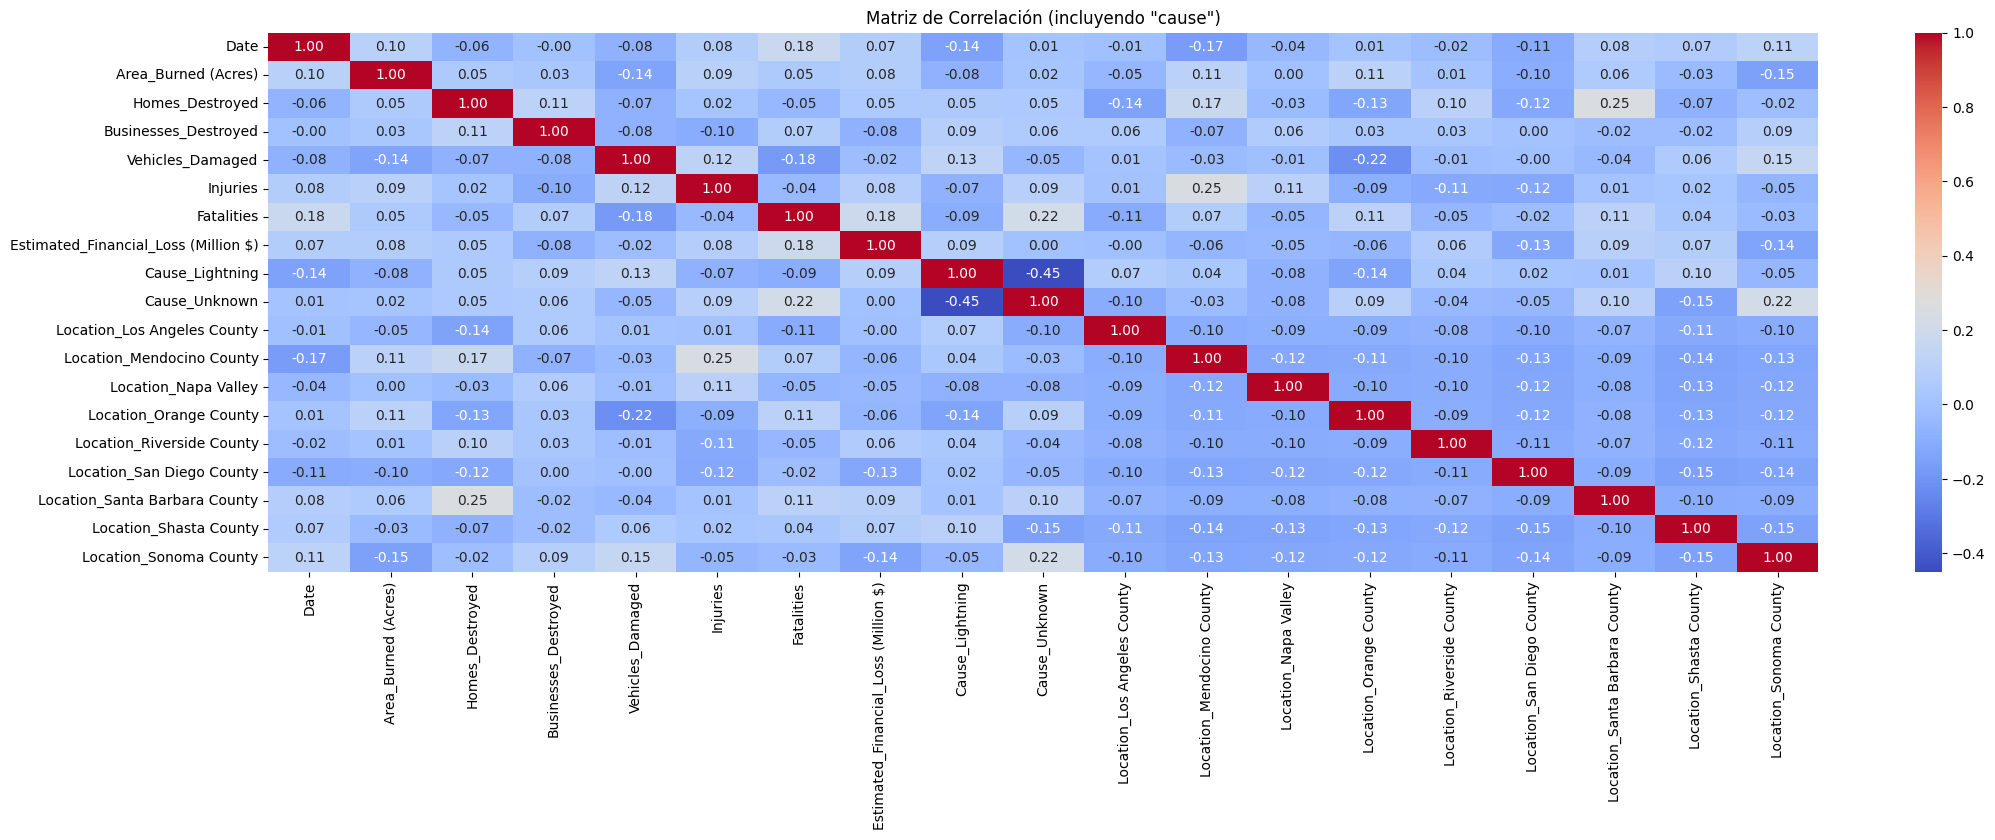

In [ ]:
#Convertimos los datos de la variable "date" de un string a formato de fecha para que pueda ser operada en la matriz
df['Date'] = pd.to_datetime(df['Date'])

# Convierte las columnas booleanas a numéricas (0 y 1)
df['Cause_Lightning'] = df['Cause_Lightning'].astype(int)
df['Cause_Unknown'] = df['Cause_Unknown'].astype(int)

# Calcula la matriz de correlación (ahora incluirá las columnas de "cause")
correlacion_matrix = df.corr()

# Visualiza la matriz de correlación con un mapa de calor
plt.figure(figsize=(25, 7))  # Ajusta el tamaño para mayor claridad
sns.heatmap(correlacion_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (incluyendo "cause")')
plt.show()

Nuestra variables independientes (features) que nos pueden ayudar a medir el daño por los incencios son:
* Date 0.07
* Area_Burned (Acres) 0.075
* Home_destroyed 0.047
* Injuries 0.08
* Fatalities 0.018
* Cause Lighting 0.086
* Cause Unknown
* Bussines destroyed

Nuestra variable dependiente es ***Estimated_Financial_Loss*** ( Target feature )

In [ ]:
# Definir la variable independiente y la dependiente
features = ['Area_Burned (Acres)', 'Homes_Destroyed', 'Businesses_Destroyed', 'Vehicles_Damaged', 'Injuries', 'Fatalities', 'Cause_Lightning', 'Cause_Unknown']
target = 'Estimated_Financial_Loss (Million $)'

# Create feature matrix (X) and target vector (y)
X=df[features]
y=df[target]

### V. División de los datos

Divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando train_test_split de Scikit-Learn.

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### VI. Entrenamiento de modelos

1. Regresión Lineal: entrena un modelo de regresión lineal con los datos de entrenamiento.
2. Regresión No Lineal: entrena un modelo de regresión no lineal, como una regresión polinómica o un modelo de árbol de decisión.

#### Regresion Lineal simple

In [ ]:
#instanciamos el modelo, establecemos un parametro para que el modelo calcule el termino de intercepto, este termino es el valor de la variable dependiente cuando todas las independientes son cero
modelo_multiple = LinearRegression(fit_intercept = True)
#entrenamos el modelo
modelo_multiple.fit(X_train, y_train)

LinearRegression()

In [ ]:
X.shape

(100, 8)

In [ ]:
y.shape

(100,)

#### Regresion no lineal ( Polinomica )

La regresión polinómica es una técnica ingeniosa que nos permite utilizar modelos lineales para ajustar relaciones no lineales en los datos. La clave está en la transformación de las variables originales en términos polinómicos.

¿Por qué funciona esto?

Imagina que tienes una relación curva entre tus variables. En lugar de intentar ajustar una línea recta (regresión lineal simple), lo que hacemos es crear nuevas variables que son potencias de las originales (x, x², x³, etc.). Al hacer esto, ¡la relación se vuelve lineal en el espacio de las nuevas variables!

In [ ]:
polinomio = PolynomialFeatures(degree = 4, include_bias = True)    #Transformamos las variables a polinomicas
X_p = polinomio.fit_transform(X)

X_train_p, X_test_p, y_train, y_test = train_test_split(X_p, y, test_size=0.2, random_state=42)

modelo_polinomio = LinearRegression()
modelo_polinomio.fit(X_train_p, y_train)

LinearRegression()

Una conversion polinomial de grado 4 nos permite obtener un regresion lineal que se ajusta perfectamente a los datos.

In [ ]:
# Rango de grados de polinomio a probar
grados = range(2, 5)

# Lista para almacenar los resultados
resultados = []

for grado in grados:
    # Crea el Pipeline con el grado actual
    pipe = Pipeline([('polinomio', PolynomialFeatures(degree=grado, include_bias=True)),
                     ('modelo', LinearRegression())])

    # Ajusta el modelo
    pipe.fit(X, y)

    # Calcula el R^2
    score = pipe.score(X, y)

    # Almacena los resultados
    resultados.append({'grado': grado, 'score': score, 'modelo': pipe})

# Encuentra el mejor modelo
mejor_modelo = max(resultados, key=lambda x: x['score'])

# Imprime los resultados
print("Mejor grado:", mejor_modelo['grado'])
print("Mejor R^2:", mejor_modelo['score'])

Mejor grado: 4
Mejor R^2: 1.0


### VII. Evaluación de modelos

1. Evalúa el rendimiento de ambos modelos utilizando métricas como el error cuadrático medio (MSE) y el coeficiente de determinación (R²).
2. Compara los resultados y determina qué modelo se desempeña mejor en este contexto.

In [ ]:
y_pred = modelo_multiple.predict(X)
modelo_multiple.score(X, y)

0.06454445667706599

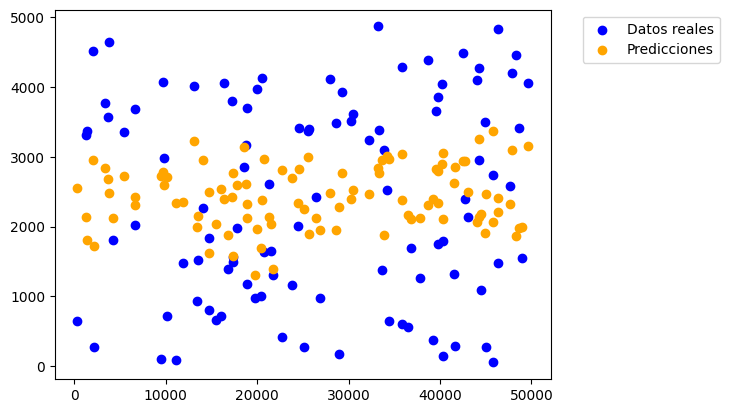

In [ ]:
# Grafica los datos reales con una etiqueta
plt.scatter(X.iloc[:, 0], y, label='Datos reales', color='blue')

# Grafica las predicciones con otra etiqueta
plt.scatter(X.iloc[:, 0], y_pred, label='Predicciones', color='orange')

# Agrega la leyenda FUERA del gráfico
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Ajusta la posición según sea necesario

# Muestra el gráfico
plt.show()

In [ ]:
#particionamos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#comprobamos los tamaños del train y del test
X_train.shape, X_test.shape

((70, 8), (30, 8))

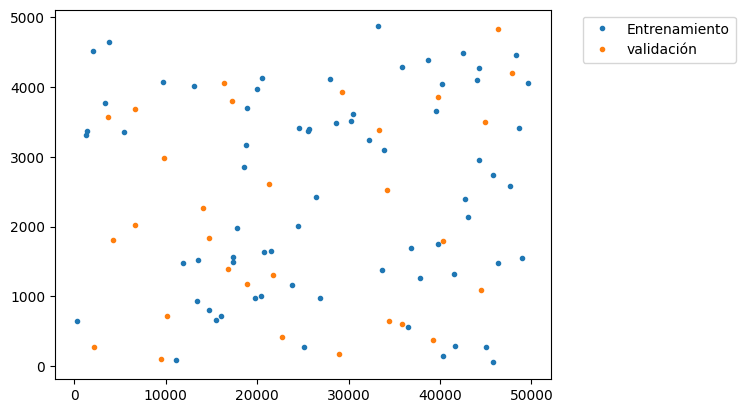

In [ ]:
plt.plot(X_train.iloc[:, 0], y_train, '.', label = 'Entrenamiento')
plt.plot(X_test.iloc[:, 0], y_test, '.', label = 'validación')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
#creamos el pipeline para incorporar el test

#intanciamos el pipeline
pipe = Pipeline([('polinomio', PolynomialFeatures(include_bias = True)),
                 ('modelo', LinearRegression())])

#establecemos los posibles valores del hiperparametro (los que puede tomar el grado del polinomio)
grados = range(2,5)

# creamos listas vacias para almacenar temporalmente los resultados
score_train = []
score_test = []

# Split data outside the loop
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for grado in grados:
  # Fit the pipeline on the training data only
  pipe.set_params(polinomio__degree = grado).fit(X_train, y_train)

  # Score on training and testing data
  score_train.append(pipe.score(X_train, y_train))
  score_test.append(pipe.score(X_test, y_test))

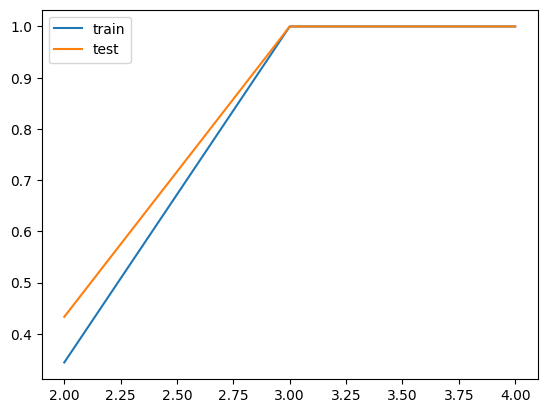

In [ ]:
plt.plot(grados, score_train, label = 'train')
plt.plot(grados, score_test, label = 'test')
plt.legend()
plt.show ()

In [ ]:
X_test_p = polinomio.transform(X_test)  # Transform X_test to have the correct number of features

# Predict on the test set for both models
y_pred_linear = modelo_multiple.predict(X_test)
y_pred_poly = modelo_polinomio.predict(X_test_p)

# Evaluate the linear regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression:")
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R-squared (R2): {r2_linear}")

# Evaluate the polynomial regression model
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("\nPolynomial Regression:")
print(f"Mean Squared Error (MSE): {mse_poly}")
print(f"R-squared (R2): {r2_poly}")

Linear Regression:
Mean Squared Error (MSE): 2015016.569668675
R-squared (R2): 0.005250776919720979

Polynomial Regression:
Mean Squared Error (MSE): 1147995.9469787113
R-squared (R2): 0.433271123649294


### VIII. Conclusión

1. Resume los hallazgos del análisis.
2. Discute las posibles razones por las cuales un modelo podría superar al otro.


La relación entre nuestros datos no es lineal, debido a que esto, tiene mejor ajuste a los datos el modelo de regresion lineal polinomial.
El desempeño de los modelos se puede observar en la sección de evaluación de los modelos, podemos observar que la regresion polinomial tiene mejor R-squared y MSE.